(1080, 720)
(720, 1080)
[0.         0.03921569 1.96078431 2.         2.03921569 3.96078431
 4.        ]


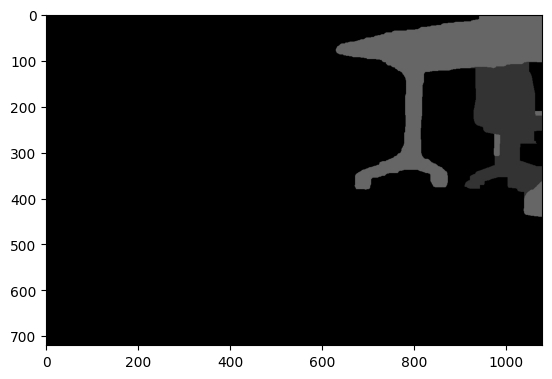

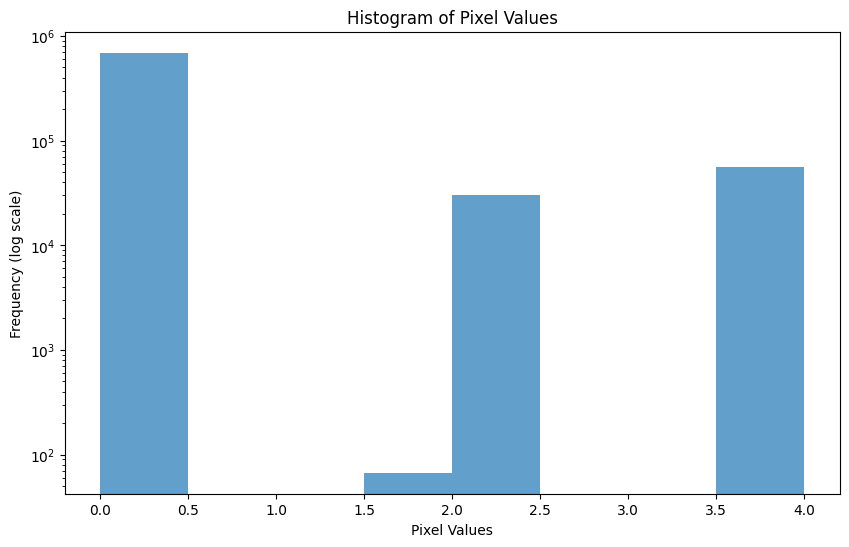

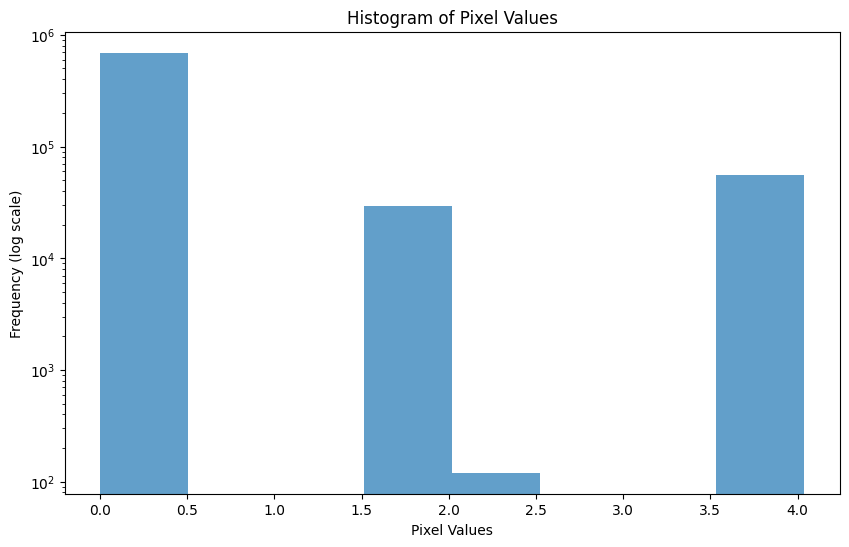

In [4]:
from PIL import Image
import numpy as np
from scipy.ndimage import grey_opening, grey_erosion, grey_dilation, grey_closing, median_filter, gaussian_filter

imgPath = "G:\\datasets\\eirt_output\\batch03\\mask_raw\\Image0001.jpg"
imgPath = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch04/mask_raw/Image0001.jpg"

# Load image
img = Image.open(imgPath)

print(img.size)

# Convert to NumPy array
arr = np.array(img)/255*10
print(arr.shape)

size = 17
arr2 = median_filter(arr, size=(size, size))
# arr2 = gaussian_filter(arr, sigma=(size, size, 0))
# Define a structuring element

# struct_element = np.ones((size, size, 3))

# # Opening operation on blurred images
# arr = grey_opening(arr, structure=struct_element)
# # arr = grey_closing(arr, structure=struct_element)

# Get unique pixel values
unique_vals = np.unique(arr)
unique_vals2 = np.unique(arr2)

print(unique_vals2)

import cv2
img = cv2.imread(imgPath)
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr2.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()

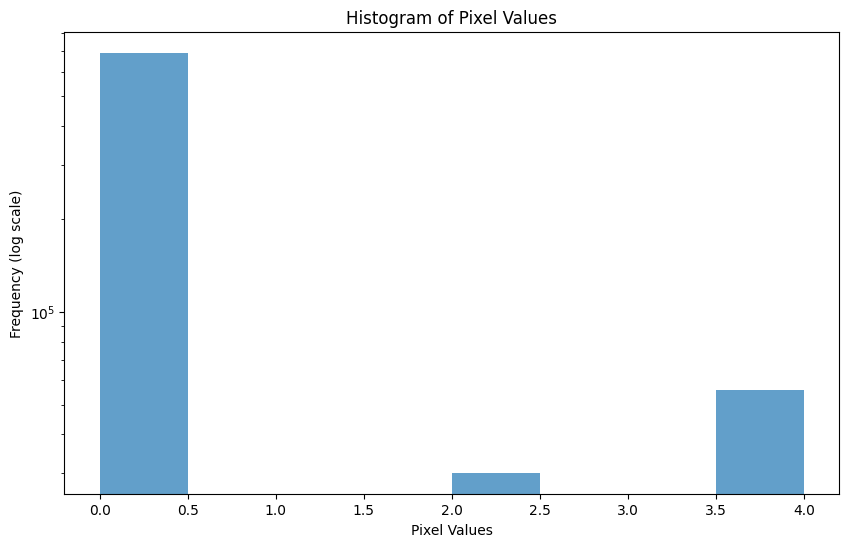

In [5]:
def filter_image(image_array, size):
    # Scale
    image_array = image_array / 255 * 10
    # Apply median filter
    filtered_array = median_filter(image_array, size=(size, size))
    # Round to nearest integer for values within 0.25 of an integer
    rounded_array = np.round(filtered_array)
    mask = np.abs(filtered_array - rounded_array) <= 0.25
    filtered_array = np.where(mask, rounded_array, np.nan)
    # Remove NaN values by setting them to 0 or filter them out
    filtered_array = np.nan_to_num(filtered_array, nan=0.0)
    return filtered_array.astype(np.uint8)

# Load image
img = Image.open(imgPath)
# Convert to NumPy array
arr = np.array(img)
unique_vals = np.unique(arr)


arr = filter_image(arr, size=17)

# Get unique pixel values

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()


In [6]:
import os

input_dir = "G:\\datasets\\eirt_output\\batch03\\mask_raw"
output_dir = "G:\\datasets\\eirt_output\\batch03\\mask"
input_dir = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch04/mask_raw"
output_dir = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch04/mask"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process all images in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        # Load and process image
        img = Image.open(input_path)
        img_array = np.array(img)
        
        # Apply filter
        filtered_array = filter_image(img_array, size=9)
        
        # Save filtered image as npy file
        output_npy_path = output_path.replace('.jpg', '.npy')
        np.save(output_npy_path, filtered_array)
        
        print(f"Processed: {filename}")

print("All images processed!")

Processed: Image0180.jpg
Processed: Image0181.jpg
Processed: Image0182.jpg
Processed: Image0183.jpg
Processed: Image0184.jpg
Processed: Image0185.jpg
Processed: Image0186.jpg
Processed: Image0187.jpg
Processed: Image0188.jpg
Processed: Image0189.jpg
Processed: Image0190.jpg
Processed: Image0191.jpg
Processed: Image0192.jpg
Processed: Image0193.jpg
Processed: Image0194.jpg
Processed: Image0195.jpg
Processed: Image0196.jpg
Processed: Image0197.jpg
Processed: Image0198.jpg
Processed: Image0199.jpg
Processed: Image0000.jpg
Processed: Image0001.jpg
Processed: Image0002.jpg
Processed: Image0003.jpg
Processed: Image0004.jpg
Processed: Image0005.jpg
Processed: Image0006.jpg
Processed: Image0007.jpg
Processed: Image0008.jpg
Processed: Image0009.jpg
Processed: Image0010.jpg
Processed: Image0011.jpg
Processed: Image0012.jpg
Processed: Image0013.jpg
Processed: Image0014.jpg
Processed: Image0015.jpg
Processed: Image0016.jpg
Processed: Image0018.jpg
Processed: Image0019.jpg
Processed: Image0020.jpg


[0 2 4 6]


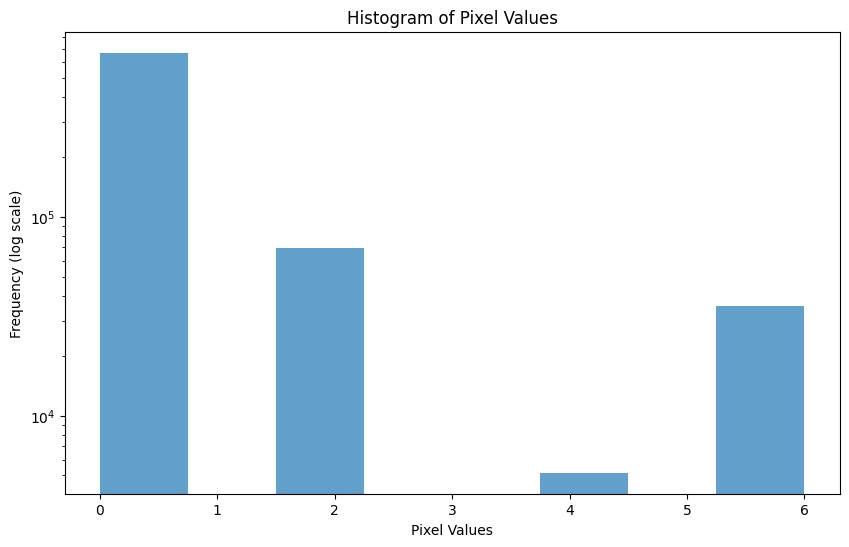

In [8]:
# img = Image.open("E:\\datasets\\eirt_output\\batch01\\mask\\Image0000.bmp")
arr = np.load("/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch04/mask/Image0003.npy")
unique = np.unique(arr)
print(unique)

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')

plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()


In [12]:
import os

# Directory containing files to rename
directory = "G:\\datasets\\eirt_output\\batch03\\rbg_gaussian"
save_path = "G:\\datasets\\eirt_output\\batch03\\rbg"
directory = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch04/rgb_gaussian"
save_path = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch04/rgb"

# Get all files in the directory and sort them
files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Rename each file
for i, filename in enumerate(files):
    old_path = os.path.join(directory, filename)
    new_filename = f"Image{i+1:04d}.png"
    new_path = os.path.join(directory, new_filename)
    
    os.rename(old_path, new_path)
    print(f"Renamed: {filename} -> {new_filename}")

print(f"\nTotal files renamed: {len(files)}")

Renamed: 0001_composite.png -> Image0001.png
Renamed: 0002_composite.png -> Image0002.png
Renamed: 0003_composite.png -> Image0003.png
Renamed: 0004_composite.png -> Image0004.png
Renamed: 0005_composite.png -> Image0005.png
Renamed: 0006_composite.png -> Image0006.png
Renamed: 0007_composite.png -> Image0007.png
Renamed: 0008_composite.png -> Image0008.png
Renamed: 0009_composite.png -> Image0009.png
Renamed: 0010_composite.png -> Image0010.png
Renamed: 0011_composite.png -> Image0011.png
Renamed: 0012_composite.png -> Image0012.png
Renamed: 0013_composite.png -> Image0013.png
Renamed: 0014_composite.png -> Image0014.png
Renamed: 0015_composite.png -> Image0015.png
Renamed: 0016_composite.png -> Image0016.png
Renamed: 0017_composite.png -> Image0017.png
Renamed: 0018_composite.png -> Image0018.png
Renamed: 0019_composite.png -> Image0019.png
Renamed: 0020_composite.png -> Image0020.png
Renamed: 0021_composite.png -> Image0021.png
Renamed: 0022_composite.png -> Image0022.png
Renamed: 0

In [ ]:


save_path = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch_real/mask"

# Get all files in the directory and sort them
files = sorted([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Rename each file
for i, filename in enumerate(files):
    old_path = os.path.join(save_path, filename)
    new_filename = f"Image{i+1:04d}.png"
    new_path = os.path.join(save_path, new_filename)
    
    os.rename(old_path, new_path)
    print(f"Renamed: {filename} -> {new_filename}")

print(f"\nTotal files renamed: {len(files)}")

In [13]:
mask_src = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch_real/mask"
rgb_src = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch_real/rgb"
dst_base = "/media/ap/00802B74802B6F7A/Users/andpo/Documents/EIRT/Caspers_fredags_filer/batch_real_cropped"
dst_mask = os.path.join(dst_base, "mask")
dst_rgb = os.path.join(dst_base, "rgb")

os.makedirs(dst_mask, exist_ok=True)
os.makedirs(dst_rgb, exist_ok=True)

# Crop npy masks
for fname in sorted(f for f in os.listdir(mask_src) if f.lower().endswith(".npy")):
    src_path = os.path.join(mask_src, fname)
    arr_mask = np.load(src_path)
    cropped = arr_mask[:, 100:1180]  # keep height 720, crop width to 1080
    np.save(os.path.join(dst_mask, fname), cropped)
    print(f"Cropped mask: {fname}")

# Crop RGB images
for fname in sorted(f for f in os.listdir(rgb_src) if f.lower().endswith(".jpg")):
    src_path = os.path.join(rgb_src, fname)
    with Image.open(src_path) as im:
        cropped_im = im.crop((100, 0, 1180, 720))
        cropped_im.save(os.path.join(dst_rgb, fname))
    print(f"Cropped image: {fname}")

print("Cropping completed.")

Cropped mask: 20251205_093129.npy
Cropped mask: 20251205_093140.npy
Cropped mask: 20251205_093148.npy
Cropped mask: 20251205_093200.npy
Cropped mask: 20251205_093210.npy
Cropped mask: 20251205_093219.npy
Cropped mask: 20251205_093227.npy
Cropped mask: 20251205_093233.npy
Cropped mask: 20251205_093235.npy
Cropped mask: 20251205_093245.npy
Cropped mask: 20251205_093301.npy
Cropped mask: 20251205_093317.npy
Cropped mask: 20251205_093324.npy
Cropped mask: 20251205_093333.npy
Cropped mask: 20251205_093418.npy
Cropped mask: 20251205_093433.npy
Cropped mask: 20251205_093436.npy
Cropped mask: 20251205_093439.npy
Cropped mask: 20251205_093445.npy
Cropped mask: 20251205_093454.npy
Cropped mask: 20251205_093518.npy
Cropped mask: 20251205_093522.npy
Cropped mask: 20251205_093526.npy
Cropped mask: 20251205_093539.npy
Cropped mask: 20251205_093547.npy
Cropped mask: 20251205_093552.npy
Cropped mask: 20251205_093609.npy
Cropped mask: 20251205_093620.npy
Cropped mask: 20251205_093623.npy
Cropped mask: 

In [14]:
# Crop npy masks
for fname in sorted(f for f in os.listdir(mask_src) if f.lower().endswith(".npy")):
    src_path = os.path.join(dst_mask, fname)
    arr_mask = np.load(src_path)
    print(f"dimension for  {fname}: {arr_mask.shape}")

# Crop RGB images
for fname in sorted(f for f in os.listdir(rgb_src) if f.lower().endswith(".jpg")):
    src_path = os.path.join(dst_rgb, fname)
    with Image.open(src_path) as im:
        print(f"dimension for  {fname}: {im.size}")

dimension for  20251205_093129.npy: (720, 1080)
dimension for  20251205_093140.npy: (720, 1080)
dimension for  20251205_093148.npy: (720, 1080)
dimension for  20251205_093200.npy: (720, 1080)
dimension for  20251205_093210.npy: (720, 1080)
dimension for  20251205_093219.npy: (720, 1080)
dimension for  20251205_093227.npy: (720, 1080)
dimension for  20251205_093233.npy: (720, 1080)
dimension for  20251205_093235.npy: (720, 1080)
dimension for  20251205_093245.npy: (720, 1080)
dimension for  20251205_093301.npy: (720, 1080)
dimension for  20251205_093317.npy: (720, 1080)
dimension for  20251205_093324.npy: (720, 1080)
dimension for  20251205_093333.npy: (720, 1080)
dimension for  20251205_093418.npy: (720, 1080)
dimension for  20251205_093433.npy: (720, 1080)
dimension for  20251205_093436.npy: (720, 1080)
dimension for  20251205_093439.npy: (720, 1080)
dimension for  20251205_093445.npy: (720, 1080)
dimension for  20251205_093454.npy: (720, 1080)
dimension for  20251205_093518.npy: (720